## Titanic Model Prediction

### Scikit-Learn Basic ML Algorithms and Comparison of Model Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('assets/titanic_cleaned.csv')
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


### Data Wrangling

In [3]:
df.drop(columns=['PassengerId', 'name', 'ticket'], inplace=True)

In [4]:
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked', 'pclass'], drop_first=True)

In [5]:
df_encoded.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2.0,pclass_3.0
0,1.0,29.0000,0.0,0.0,211.3375,False,False,True,False,False
1,1.0,0.9167,1.0,2.0,151.5500,True,False,True,False,False
2,0.0,2.0000,1.0,2.0,151.5500,False,False,True,False,False
3,0.0,30.0000,1.0,2.0,151.5500,True,False,True,False,False
4,0.0,25.0000,1.0,2.0,151.5500,False,False,True,False,False


In [6]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    1309 non-null   float64
 1   age         1309 non-null   float64
 2   sibsp       1309 non-null   float64
 3   parch       1309 non-null   float64
 4   fare        1309 non-null   float64
 5   sex_male    1309 non-null   bool   
 6   embarked_Q  1309 non-null   bool   
 7   embarked_S  1309 non-null   bool   
 8   pclass_2.0  1309 non-null   bool   
 9   pclass_3.0  1309 non-null   bool   
dtypes: bool(5), float64(5)
memory usage: 57.7 KB


#### Correlation Matrix

In [7]:
import matplotlib

print(matplotlib.__version__)

3.7.3


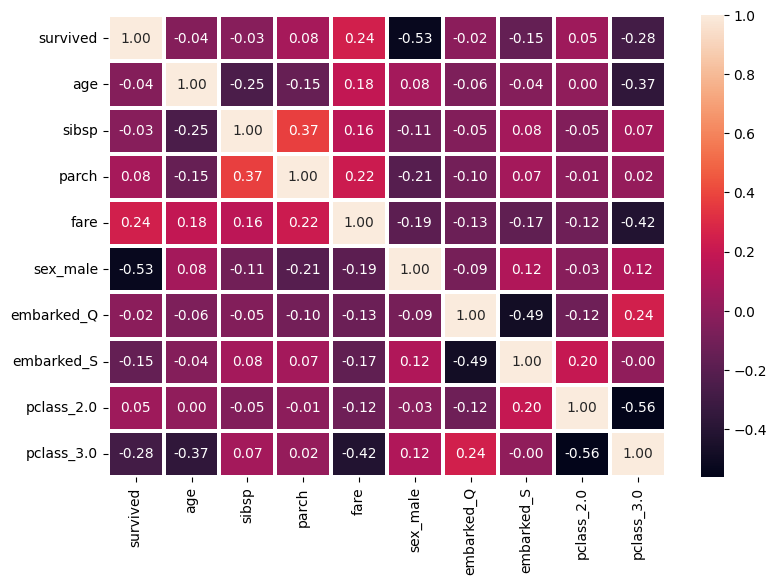

In [8]:
corr = df_encoded.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

#### Sklearn StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_encoded.drop('survived', axis=1))
scaled_features = scaler.transform(df_encoded.drop('survived', axis=1))
df_train_ml = pd.DataFrame(scaled_features, columns=df_encoded.columns[:-1])

In [10]:
X = df_train_ml.drop('survived', axis=1)
y = df_encoded['survived']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

We test the following classifiers from scikit-learn:
- Logistic Regression
- Gaussian Naive Bayes
- K Nearest Neighbors KNN
- Decision Tree Classifier
- Random Forest Classifier
- SVM Classifier

For comparison of the result we use these metrics: <br>
accuracy_score, classification_report, confusion_matrix

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Confusion Matrix:** Used to evaluate the quality of the output of a classifier. <br>
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The rows of a confusion matrix correspond to the true (actual) classes and the columns correspond to the predicted classes. <br>
So, all together the confusion matrix for a binary classifier consists of 4 values: 

TN FP <br>
FN TP <br>

TN: True Negatives (Prediction: Not survived, true: Not Survived) <br>
FP: False Positives(Prediction: survived, true: not survived) <br>
FN: False Negative(Prediction: not survived, true: survived) <br>
TP: True Positives (prediction: survived, true: survived) <br>


**Accuracy Score:** <br> 
classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)


**Classification Report:** <br>
THe precision is the ration tp/(tp+fp) where tp is the number of true positive and fp the number of false positives, The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp/(tp+fn) where tp is the number of true positive and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-Beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true
precision recall f1-score support

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [20]:
lr_cm = confusion_matrix(y_test, pred_logreg)
print(lr_cm)

[[195  45]
 [ 42 111]]


In [21]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       240
         1.0       0.71      0.73      0.72       153

    accuracy                           0.78       393
   macro avg       0.77      0.77      0.77       393
weighted avg       0.78      0.78      0.78       393



In [22]:
lr_acc = accuracy_score(y_test, pred_logreg)
print(lr_acc)

0.7786259541984732


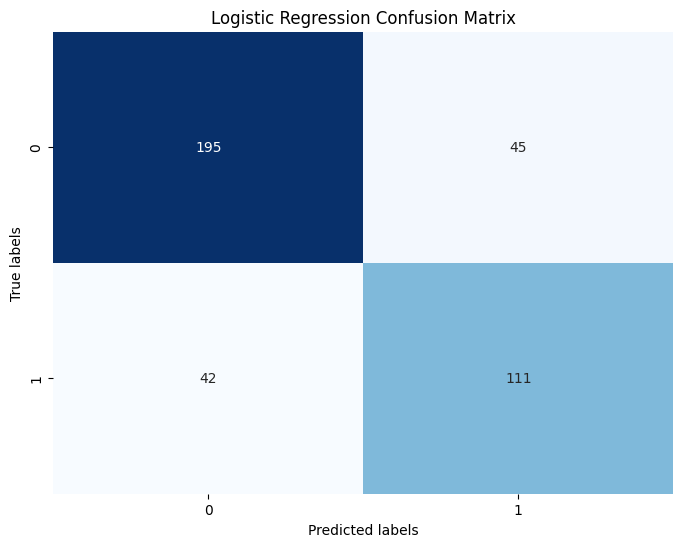

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

In [25]:
gnb_cm = confusion_matrix(y_test, pred_gnb)
print(gnb_cm)

[[196  44]
 [ 40 113]]


In [26]:
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       240
         1.0       0.72      0.74      0.73       153

    accuracy                           0.79       393
   macro avg       0.78      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [28]:
gnb_acc = accuracy_score(y_test, pred_gnb)
print(gnb_acc)

0.7862595419847328


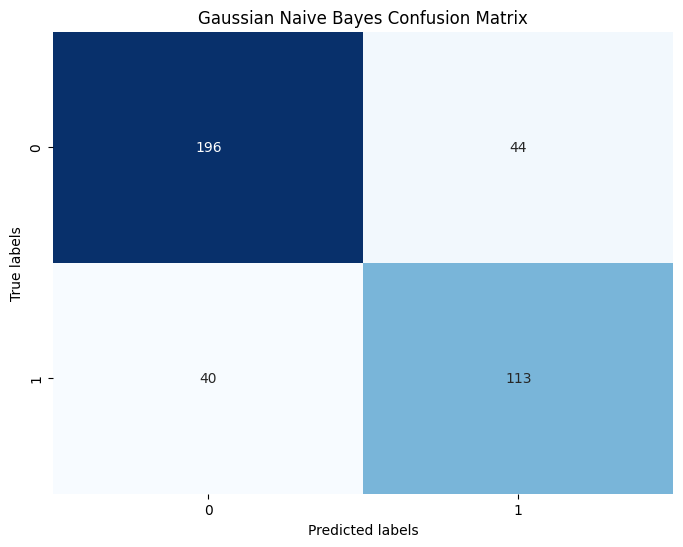

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

### KNN - KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [31]:
pred_knn = knn.predict(X_test)

In [32]:
knn_cm = confusion_matrix(y_test, pred_knn)
print(knn_cm)

[[220  20]
 [ 60  93]]


In [33]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       240
         1.0       0.82      0.61      0.70       153

    accuracy                           0.80       393
   macro avg       0.80      0.76      0.77       393
weighted avg       0.80      0.80      0.79       393



In [34]:
knn_acc = accuracy_score(y_test, pred_knn)
print(knn_acc)

0.7964376590330788


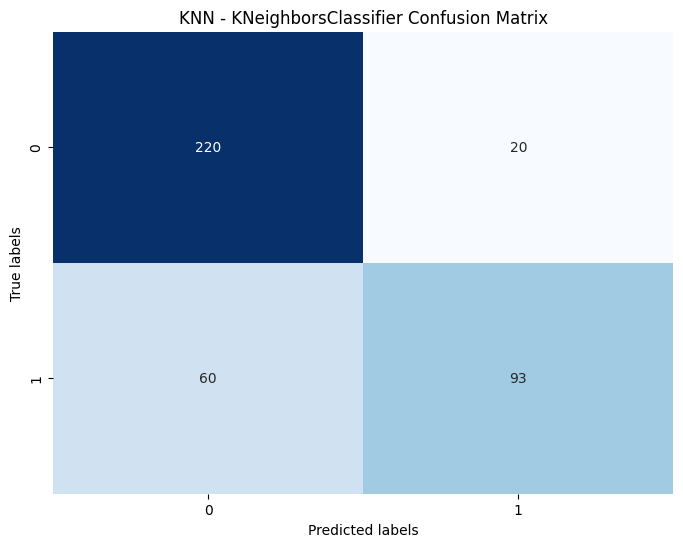

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN - KNeighborsClassifier Confusion Matrix')
plt.show()

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
pred_dtree = dtree.predict(X_test)

In [39]:
dtree_cm = confusion_matrix(y_test, pred_dtree)
print(dtree_cm)

[[199  41]
 [ 48 105]]


In [40]:
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       240
         1.0       0.72      0.69      0.70       153

    accuracy                           0.77       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.77      0.77      0.77       393



In [41]:
dtree_acc = accuracy_score(y_test, pred_dtree)
print(dtree_acc)

0.7735368956743003


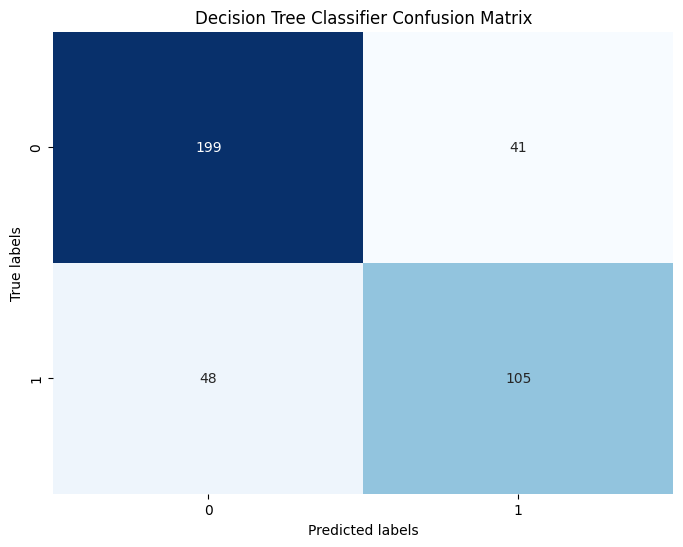

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(dtree_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

In [43]:
dtree_2 = DecisionTreeClassifier(max_features=7, max_depth=6, min_samples_split=8)
dtree_2.fit(X_train, y_train)
pred_dtree_2 = dtree_2.predict(X_test)

In [44]:
dtree_2_cm = confusion_matrix(y_test, pred_dtree_2)
print(dtree_2_cm)

[[214  26]
 [ 55  98]]


In [45]:
print(classification_report(y_test, pred_dtree_2))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       240
         1.0       0.79      0.64      0.71       153

    accuracy                           0.79       393
   macro avg       0.79      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



In [46]:
dtree_2_acc = accuracy_score(y_test, pred_dtree_2)
print(dtree_2_acc)

0.7938931297709924


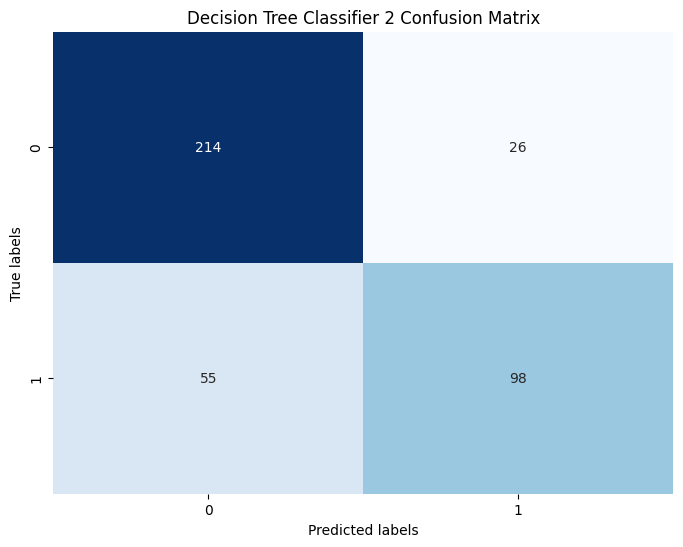

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(dtree_2_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Classifier 2 Confusion Matrix')
plt.show()

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [49]:
pred_rfc = rfc.predict(X_test)

In [50]:
rfc_cm = confusion_matrix(y_test, pred_rfc)
print(rfc_cm)

[[219  21]
 [ 59  94]]


In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       240
         1.0       0.82      0.61      0.70       153

    accuracy                           0.80       393
   macro avg       0.80      0.76      0.77       393
weighted avg       0.80      0.80      0.79       393



In [52]:
rfc_acc = accuracy_score(y_test, pred_rfc)
print(rfc_acc)

0.7964376590330788


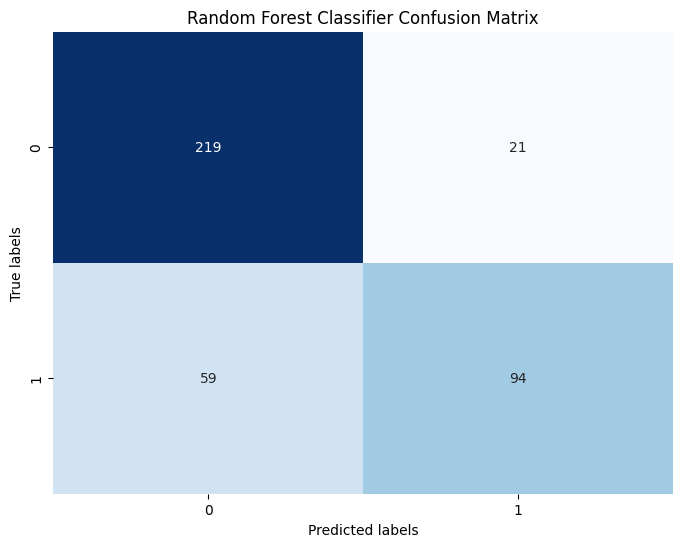

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

### SVM Classifier

In [54]:
from sklearn.svm import SVC
svc = SVC(gamma=0.01, C=100)
svc.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [55]:
pred_svc = svc.predict(X_test)

In [56]:
svm_cm = confusion_matrix(y_test, pred_svc)
print(svm_cm)

[[224  16]
 [ 66  87]]


In [57]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.85       240
         1.0       0.84      0.57      0.68       153

    accuracy                           0.79       393
   macro avg       0.81      0.75      0.76       393
weighted avg       0.80      0.79      0.78       393



In [58]:
svm_acc = accuracy_score(y_test, pred_svc)
print(svm_acc)

0.7913486005089059


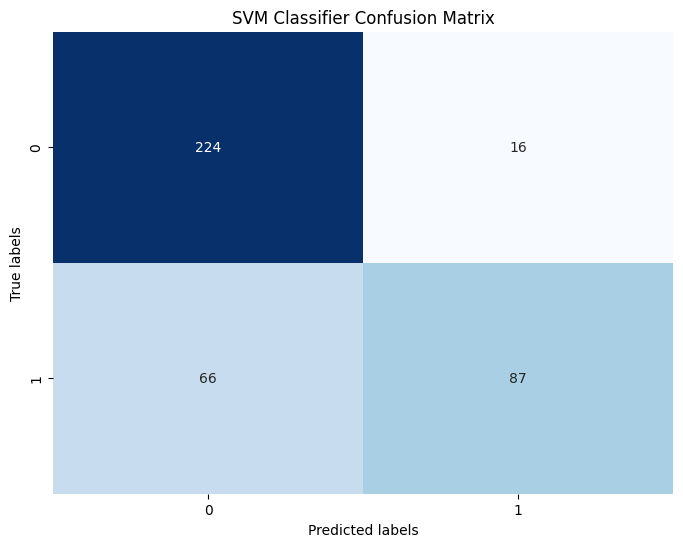

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Classifier Confusion Matrix')
plt.show()

In [70]:
acc_scores = {'lr_acc': lr_acc, 'gnb_acc': gnb_acc, 'knn_acc': knn_acc, 'rfc_acc': rfc_acc, 'svm_acc': svm_acc, 'dtree_acc': dtree_acc, 'dtree_2_acc': dtree_2_acc}
df_acc = pd.DataFrame.from_dict(acc_scores, orient='index', columns=['Accuracy'])
df_acc.reset_index(inplace=True)
df_acc.rename(columns={'index': 'Model'}, inplace=True)

In [71]:
df_acc.head()

,Model,Accuracy
0,lr_acc,0.778626
1,gnb_acc,0.786260
2,knn_acc,0.796438
3,rfc_acc,0.796438
4,svm_acc,0.791349


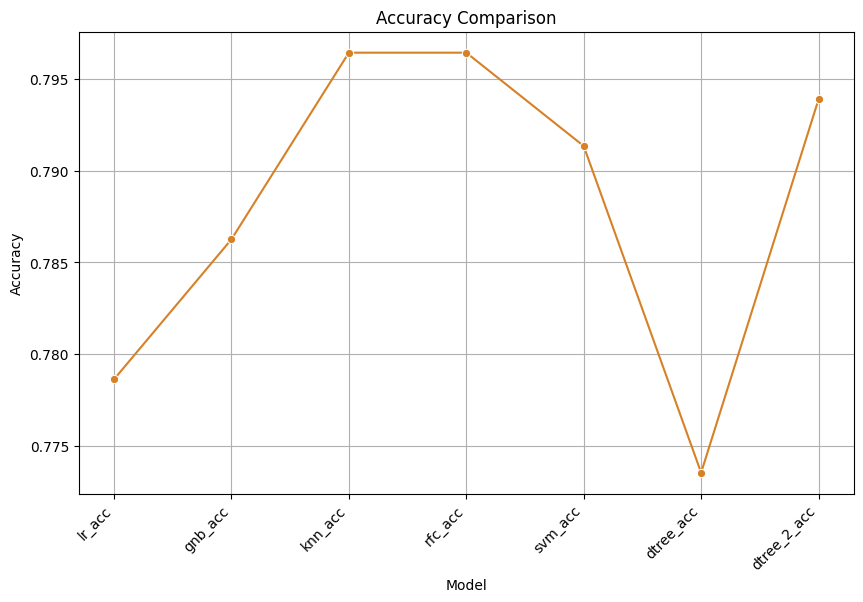

In [84]:
# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=df_acc, marker='o', sort=False, color='#d68127')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.show()

### K Fold Cross Validation

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data

It leads to a better estimate for out of sample data than simple train test split

In [73]:
from sklearn.model_selection import cross_val_score

#### for SVM Classifier

In [74]:
scores_svc = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81521739 0.77173913 0.81521739 0.80434783 0.79347826 0.76086957
 0.8021978  0.78021978 0.86813187 0.81318681]
0.8024605828953655


#### for Random Forest Classifier

In [75]:
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.80434783 0.77173913 0.7826087  0.80434783 0.79347826 0.7173913
 0.8021978  0.8021978  0.89010989 0.8021978 ]
0.7970616340181558


In [76]:
scores_dtree_2 = cross_val_score(dtree_2, X_train, y_train, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.7826087  0.7826087  0.7826087  0.76086957 0.79347826 0.76086957
 0.8021978  0.76923077 0.85714286 0.75824176]
0.7849856665074056


**The Classifiers with best performance are Decision Tree, Random Forest and SVC**

In [77]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.7849856665074056
rfc     :  0.7970616340181558
svc     :  0.8024605828953655


In [85]:
mean_scores = {'dtree_2': scores_dtree_2.mean(),
               'rfc': scores_rfc.mean(),
               'svc': scores_svc.mean()}

df_mean_scores = pd.DataFrame(list(mean_scores.items()), columns=['Model', 'Mean Score'])

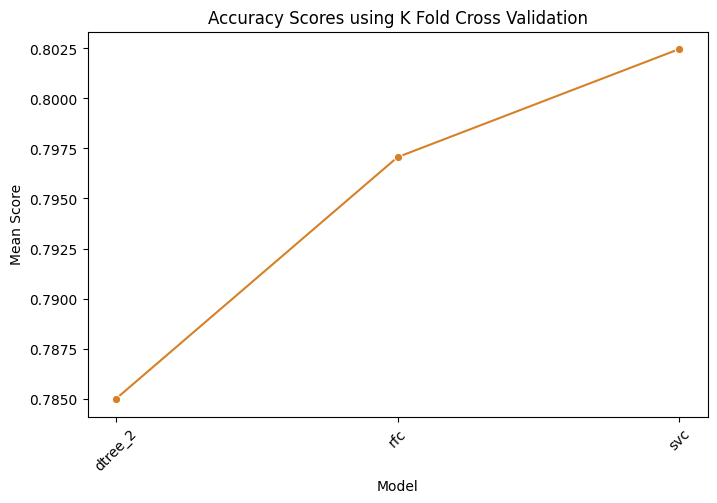

In [94]:
# Plot the line chart
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_mean_scores, x='Model', y='Mean Score', marker='o', sort=False, color='#d68127')
plt.xlabel('Model')
plt.ylabel('Mean Score')
plt.title('Accuracy Scores using K Fold Cross Validation')
plt.xticks(rotation=45)
plt.show()

### fin.